In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-india-status/latest Covid-19 India Status1.csv


In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df=pd.read_csv("/kaggle/input/covid19-india-status/latest Covid-19 India Status1.csv")
df

,State/UTs,Total Cases,Active,Deaths,Active Ratio (%),Death Ratio (%)
0,Maharashtra,6122893,117869,123857,1.93,2.02
1,Kerala,3011694,108400,14108,3.60,0.47
2,Karnataka,2862338,39626,35601,1.38,1.24
3,Tamil Nadu,2506848,34076,33196,1.36,1.32
4,Andhra Pradesh,1911231,32356,12919,1.69,0.68
5,Uttar Pradesh,1706934,1947,22666,0.11,1.33
6,West Bengal,1508223,16655,17850,1.10,1.18
7,Delhi,1434780,858,25005,0.06,1.74
8,Chhattisgarh,996689,5017,13464,0.50,1.35
9,Rajasthan,952887,935,8942,0.10,0.94


In [5]:
df.shape

(36, 6)

In [6]:
df.isnull().sum()

State/UTs           0
Total Cases         0
Active              0
Deaths              0
Active Ratio (%)    0
Death Ratio (%)     0
dtype: int64

- no missing values in the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State/UTs         36 non-null     object 
 1   Total Cases       36 non-null     int64  
 2   Active            36 non-null     int64  
 3   Deaths            36 non-null     int64  
 4   Active Ratio (%)  36 non-null     float64
 5   Death Ratio (%)   36 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ KB


- find out the unique values in columns

In [8]:
for i in df.columns:
    print(i,"-----",df[i].unique())

State/UTs ----- ['Maharashtra' 'Kerala' 'Karnataka' 'Tamil Nadu' 'Andhra Pradesh'
 'Uttar Pradesh' 'West Bengal' 'Delhi' 'Chhattisgarh' 'Rajasthan' 'Odisha'
 'Gujarat' 'Madhya Pradesh' 'Haryana' 'Bihar' 'Telengana' 'Punjab' 'Assam'
 'Jharkhand' 'Uttarakhand' 'Jammu and Kashmir' 'Himachal Pradesh' 'Goa'
 'Puducherry' 'Manipur' 'Tripura' 'Chandigarh' 'Meghalaya'
 'Arunachal Pradesh' 'Nagaland' 'Mizoram' 'Sikkim' 'Ladakh'
 'Dadra and Nagar Haveli and Daman and Diu' 'Lakshadweep'
 'Andaman and Nicobar']
Total Cases ----- [6122893 3011694 2862338 2506848 1911231 1706934 1508223 1434780  996689
  952887  929788  824029  790070  769093  722850  629054  596970  524556
  346113  340959  317761  203117  168015  118416   74341   69019   61780
   52712   38283   25663   22703   21573   20143   10576    9965    7491]
Active ----- [117869 108400  39626  34076  32356   1947  16655    858   5017    935
  25148   1969    441   1066   1183  11472   1964  23371    532   1506
  34391   1338   1950   1753 

- find out the number of states ?

In [9]:
df["State/UTs"].nunique()

36

- find out the total cases of each state?

In [10]:
k=df.groupby(["State/UTs"])["Total Cases"].agg(["max","min","sum"]).sort_values(by="max",ascending=False)
k.reset_index(inplace=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


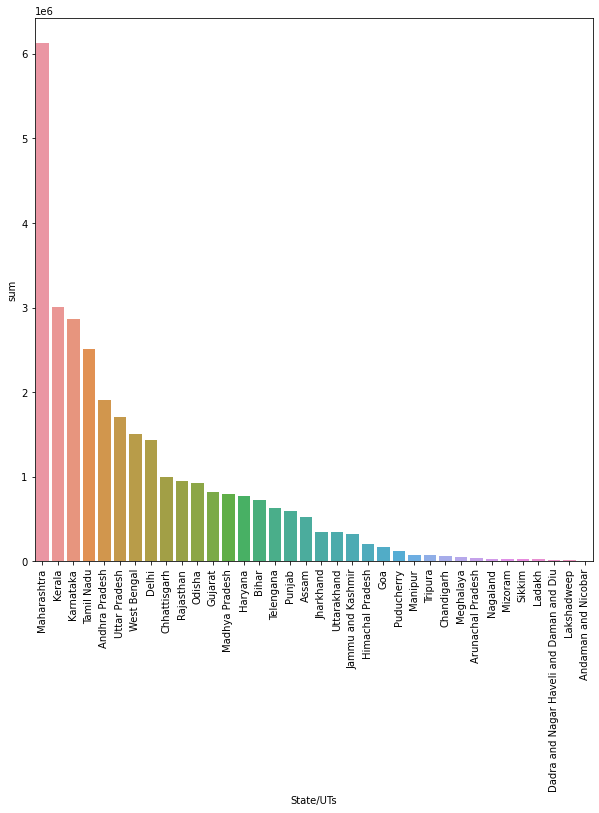

In [11]:
plt.figure(figsize=(10,10));
sns.barplot(k["State/UTs"],k["sum"],data=k);
plt.xticks(rotation=90);

- most affected state was maharastra 
- least affected state was andaman and nicobar

- 1e6 means : 1 * 10 * 6
- on y- axis : 1,2,3,4,5,6 would be multiplied by 1e6 means 1 * 10^6

- find out the top 10 and bottom 10 affected states 

In [12]:
k.head(10)

,State/UTs,max,min,sum
0,Maharashtra,6122893,6122893,6122893
1,Kerala,3011694,3011694,3011694
2,Karnataka,2862338,2862338,2862338
3,Tamil Nadu,2506848,2506848,2506848
4,Andhra Pradesh,1911231,1911231,1911231
5,Uttar Pradesh,1706934,1706934,1706934
6,West Bengal,1508223,1508223,1508223
7,Delhi,1434780,1434780,1434780
8,Chhattisgarh,996689,996689,996689
9,Rajasthan,952887,952887,952887


In [13]:
k.tail(10)


,State/UTs,max,min,sum
26,Chandigarh,61780,61780,61780
27,Meghalaya,52712,52712,52712
28,Arunachal Pradesh,38283,38283,38283
29,Nagaland,25663,25663,25663
30,Mizoram,22703,22703,22703
31,Sikkim,21573,21573,21573
32,Ladakh,20143,20143,20143
33,Dadra and Nagar Haveli and Daman and Diu,10576,10576,10576
34,Lakshadweep,9965,9965,9965
35,Andaman and Nicobar,7491,7491,7491


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


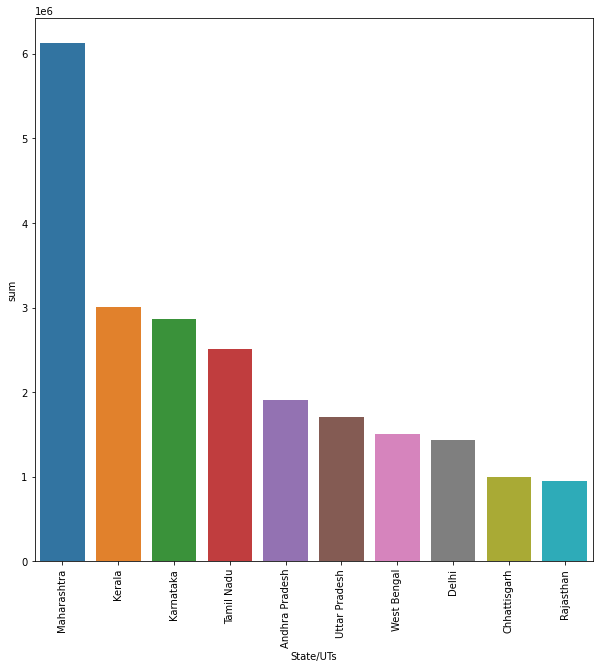

In [14]:
plt.figure(figsize=(10,10));
sns.barplot(k["State/UTs"].head(10),k["sum"].head(10),data=k);
plt.xticks(rotation=90);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


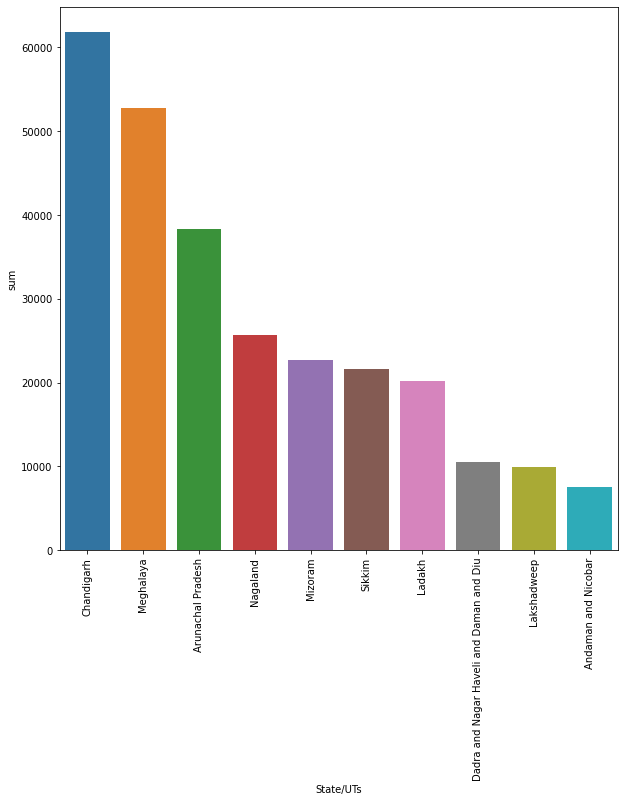

In [15]:
plt.figure(figsize=(10,10));
sns.barplot(k["State/UTs"].tail(10),k["sum"].tail(10),data=k);
plt.xticks(rotation=90);

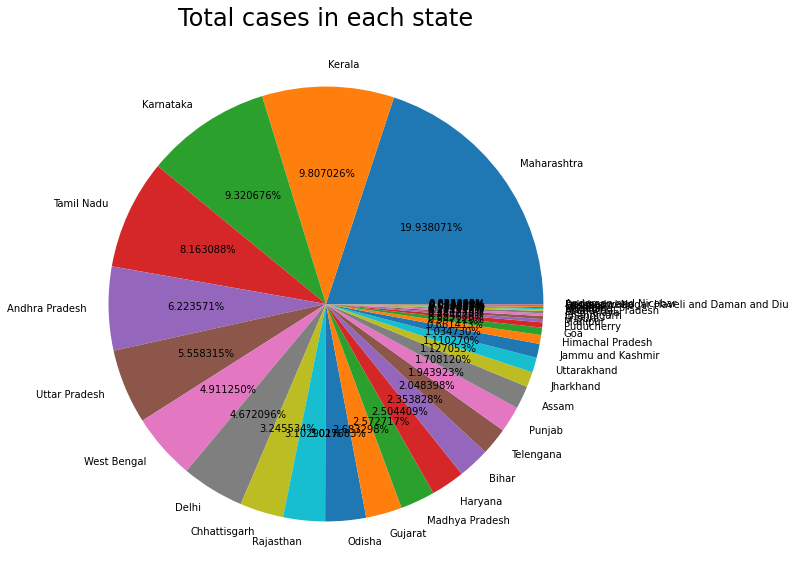

In [16]:
plt.figure(figsize=(10,10));
plt.pie(x="Total Cases",data=df,labels="State/UTs",autopct="%1f%%");
plt.title("Total cases in each state", fontsize = 24);

- can not see properly, so we will see for 10 states

- for top 10 states

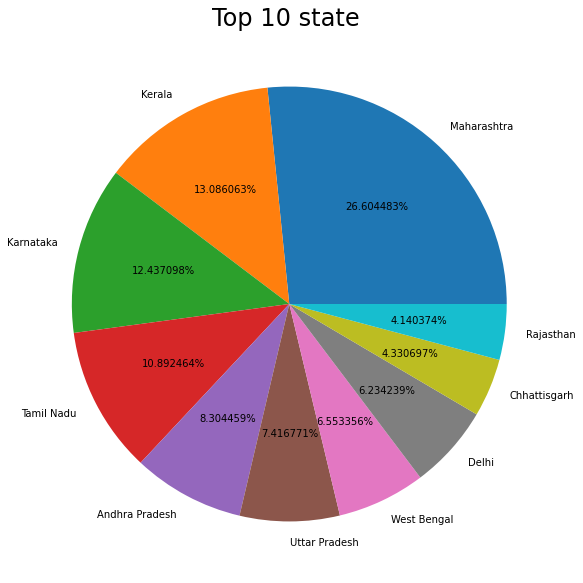

In [17]:
plt.figure(figsize=(10,10));
plt.pie(x=k["sum"].head(10),data=k,labels=k["State/UTs"].head(10),autopct="%1f%%");
plt.title("Top 10 state ", fontsize = 24);


## Active cases

- find most affected and affected states in terms of active cases 

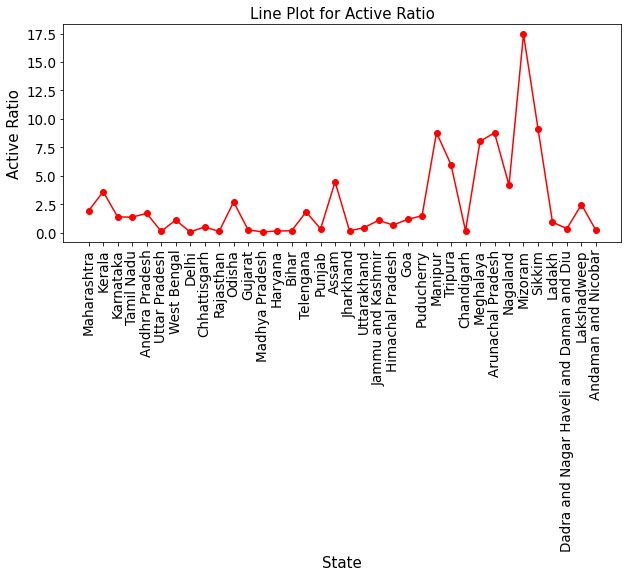

In [18]:
plt.figure(figsize=(10,4))
plt.plot(df['State/UTs'],df['Active Ratio (%)'],color='red',marker='o')
plt.xticks(rotation=90,fontsize=13.5)
plt.yticks(fontsize=13.5)
plt.xlabel('State', fontsize=15)
plt.ylabel('Active Ratio', fontsize=15)
plt.title("Line Plot for Active Ratio",fontsize=15)
plt.show()


- Mizoram has the highest active ratio

- Top 10 state/UTs with active cases 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


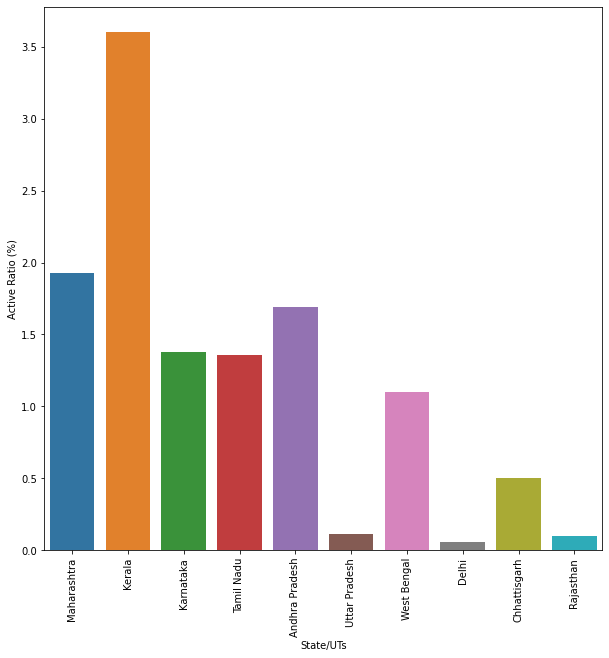

In [19]:
plt.figure(figsize=(10,10));
sns.barplot(k["State/UTs"].head(10),df['Active Ratio (%)'],data=df);
plt.xticks(rotation=90);

- Kerala has the highest active cases

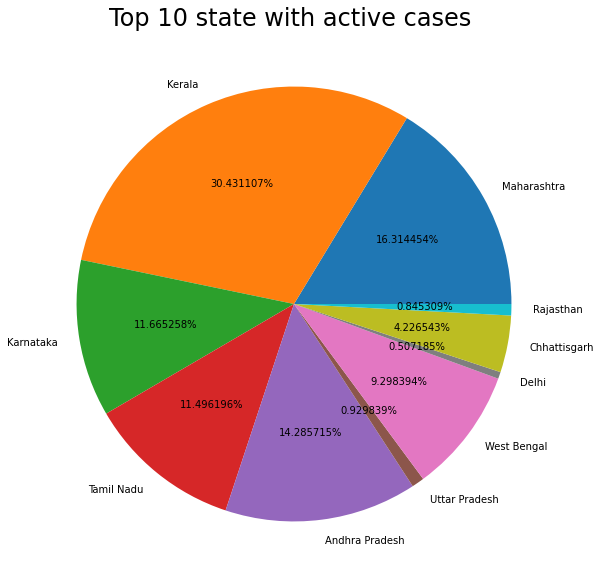

In [20]:
plt.figure(figsize=(10,10));
plt.pie(x=df["Active Ratio (%)"].head(10),data=df,labels=df["State/UTs"].head(10),autopct="%1f%%");
plt.title("Top 10 state with active cases ", fontsize = 24);

- Bottom 10 state/UTs with Active cases

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


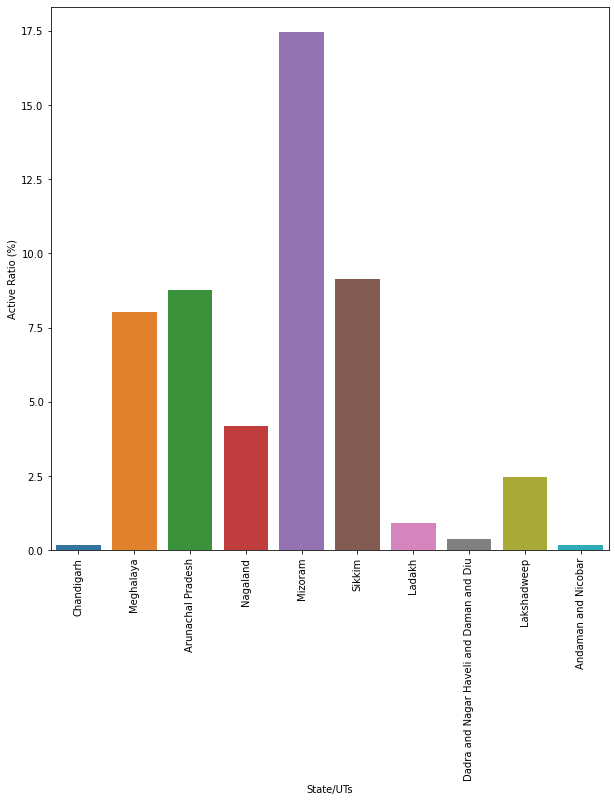

In [21]:
plt.figure(figsize=(10,10));
sns.barplot(k["State/UTs"].tail(10),df['Active Ratio (%)'],data=df);
plt.xticks(rotation=90);

- Mizoram has the lowest active cases

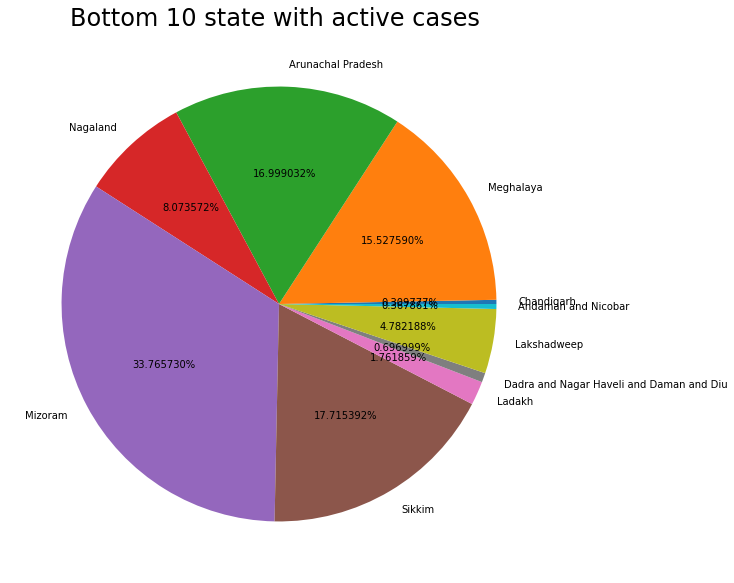

In [22]:
plt.figure(figsize=(20,10));
plt.pie(x=df["Active Ratio (%)"].tail(10),data=df,labels=df["State/UTs"].tail(10),autopct="%1f%%");
plt.title("Bottom 10 state with active cases ", fontsize = 24);

## Death Cases

- find most affected and affected states in terms of death cases

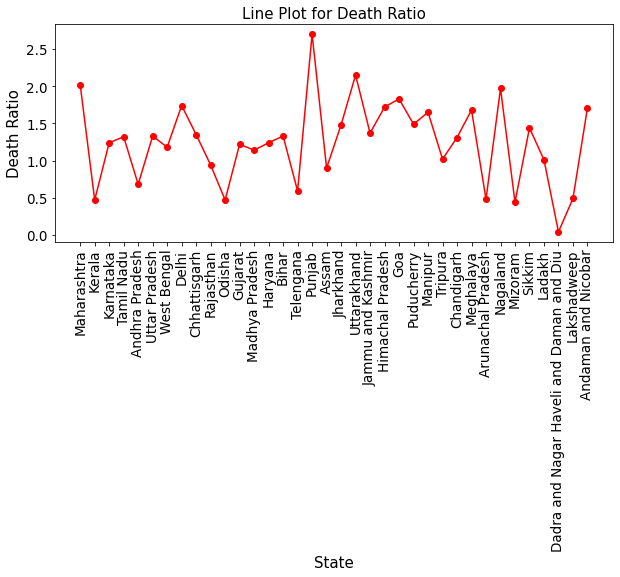

In [23]:
plt.figure(figsize=(10,4))
plt.plot(df['State/UTs'],df['Death Ratio (%)'],color='red',marker='o')
plt.xticks(rotation=90,fontsize=13.5)
plt.yticks(fontsize=13.5)
plt.xlabel('State', fontsize=15)
plt.ylabel('Death Ratio', fontsize=15)
plt.title("Line Plot for Death Ratio",fontsize=15)
plt.show()

- Punjab has the highest death ratio and second state affected is Uttarakhand
- Dadra and nagar haveli was least affected

- Top 10 state/UTs with Death cases

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


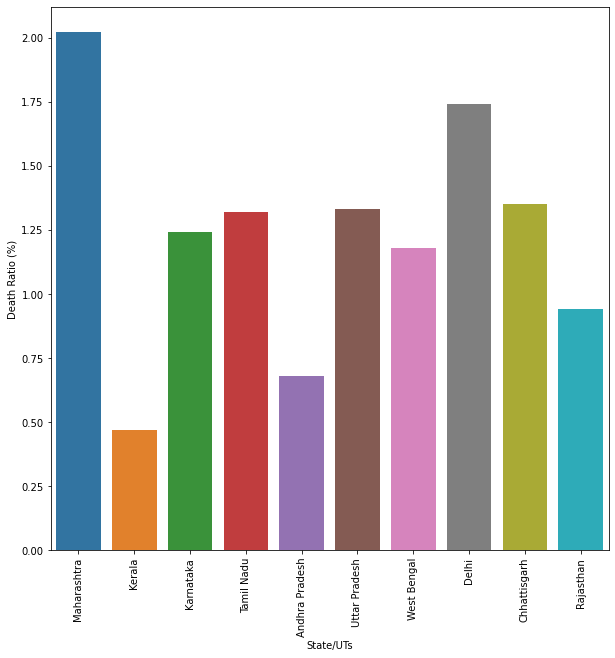

In [24]:
plt.figure(figsize=(10,10));
sns.barplot(k["State/UTs"].head(10),df['Death Ratio (%)'],data=df);
plt.xticks(rotation=90);

- Maharashtra has the highest Death cases

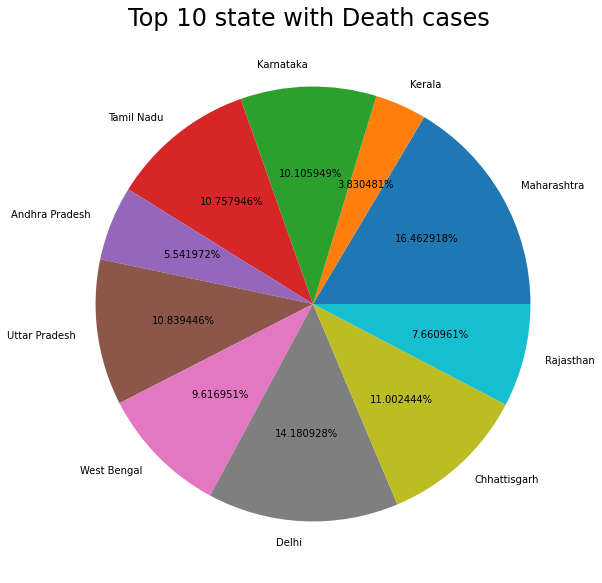

In [25]:
plt.figure(figsize=(10,10));
plt.pie(x=df["Death Ratio (%)"].head(10),data=df,labels=df["State/UTs"].head(10),autopct="%1f%%");
plt.title("Top 10 state with Death cases ", fontsize = 24);

- Bottom 10 state/UTs with Death cases

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


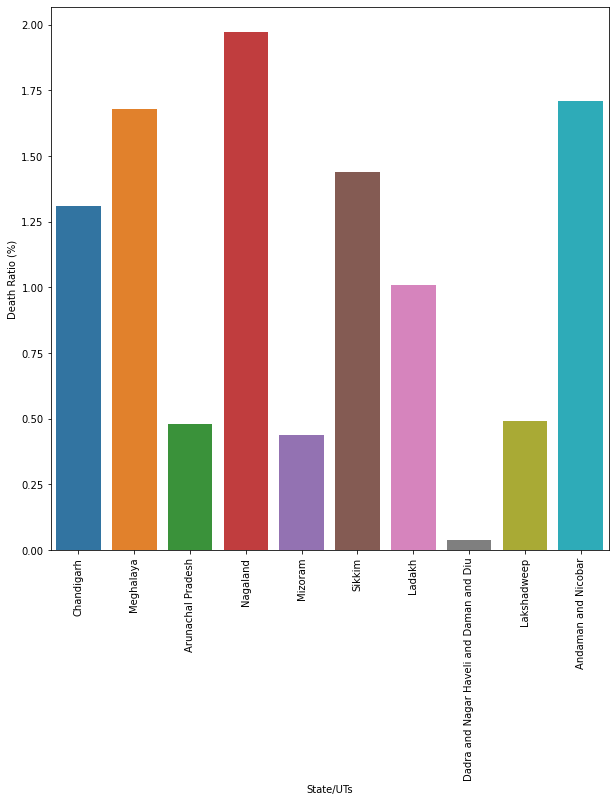

In [26]:
plt.figure(figsize=(10,10));
sns.barplot(k["State/UTs"].tail(10),df['Death Ratio (%)'],data=df);
plt.xticks(rotation=90);

- Nagaland has the lowest death cases

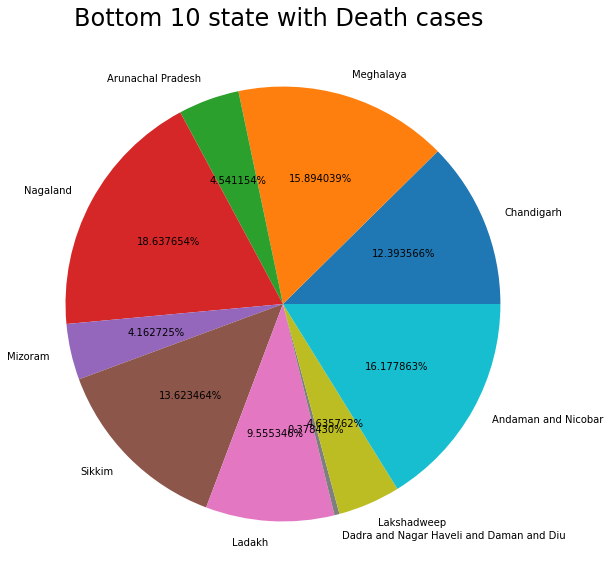

In [27]:
plt.figure(figsize=(20,10));
plt.pie(x=df["Death Ratio (%)"].tail(10),data=df,labels=df["State/UTs"].tail(10),autopct="%1f%%");
plt.title("Bottom 10 state with Death cases ", fontsize = 24);

#### will do feature engineering on recovery rate : total - active + death

## feature engineering : recovered_cases

In [28]:
recovered_cases=df['Total Cases']-(df['Active']+df['Deaths'])
recovered_cases

0     5881167
1     2889186
2     2787111
3     2439576
4     1865956
5     1682321
6     1473718
7     1408917
8      978208
9      943010
10     900282
11     811988
12     780610
13     758512
14     712055
15     613872
16     578865
17     496442
18     340463
19     332115
20     279021
21     198293
22     162983
23     114898
24      66578
25      64194
26      60872
27      47597
28      34736
29      24088
30      18643
31      19287
32      19756
33      10534
34       9670
35       7349
dtype: int64

In [29]:
df["recovered_cases"]=pd.Series(recovered_cases)

In [30]:
df.head(2)

,State/UTs,Total Cases,Active,Deaths,Active Ratio (%),Death Ratio (%),recovered_cases
0,Maharashtra,6122893,117869,123857,1.93,2.02,5881167
1,Kerala,3011694,108400,14108,3.60,0.47,2889186


- what is the average recovery rate State wise?

In [31]:
df.groupby(["State/UTs"])["recovered_cases"].mean()

State/UTs
Andaman and Nicobar                            7349.0
Andhra Pradesh                              1865956.0
Arunachal Pradesh                             34736.0
Assam                                        496442.0
Bihar                                        712055.0
Chandigarh                                    60872.0
Chhattisgarh                                 978208.0
Dadra and Nagar Haveli and Daman and Diu      10534.0
Delhi                                       1408917.0
Goa                                          162983.0
Gujarat                                      811988.0
Haryana                                      758512.0
Himachal Pradesh                             198293.0
Jammu and Kashmir                            279021.0
Jharkhand                                    340463.0
Karnataka                                   2787111.0
Kerala                                      2889186.0
Ladakh                                        19756.0
Lakshadweep       

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


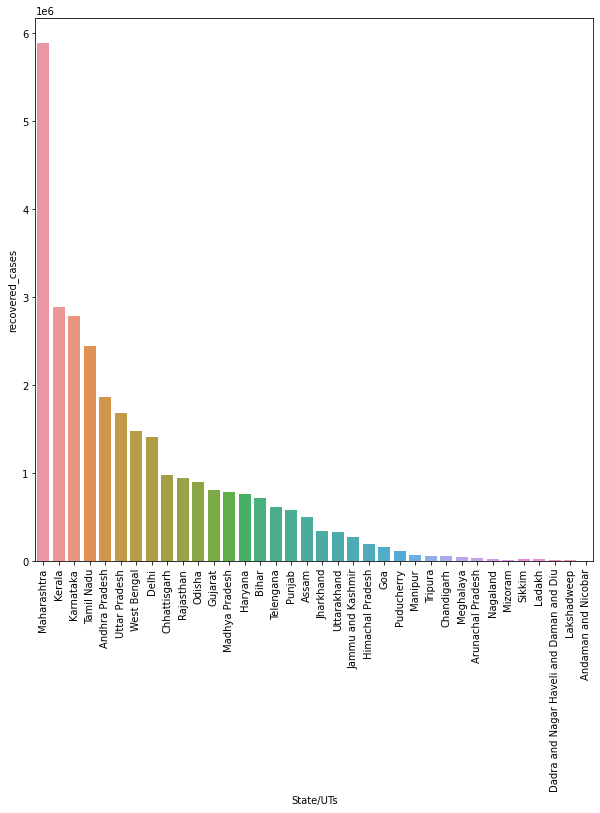

In [32]:
plt.figure(figsize=(10,10));
sns.barplot(df["State/UTs"],df["recovered_cases"],data=df);
plt.xticks(rotation=90);

### recovered_ratio

In [33]:
recovered_ratio=(df["recovered_cases"]/df["Total Cases"])*100

In [34]:
df["recovered_ratio(%)"]=pd.Series(recovered_ratio)

In [35]:
df.head(2)

,State/UTs,Total Cases,Active,Deaths,Active Ratio (%),Death Ratio (%),recovered_cases,recovered_ratio(%)
0,Maharashtra,6122893,117869,123857,1.93,2.02,5881167,96.052095
1,Kerala,3011694,108400,14108,3.60,0.47,2889186,95.932256


- find the most recovered state on the basis of recovered_ratio(%)

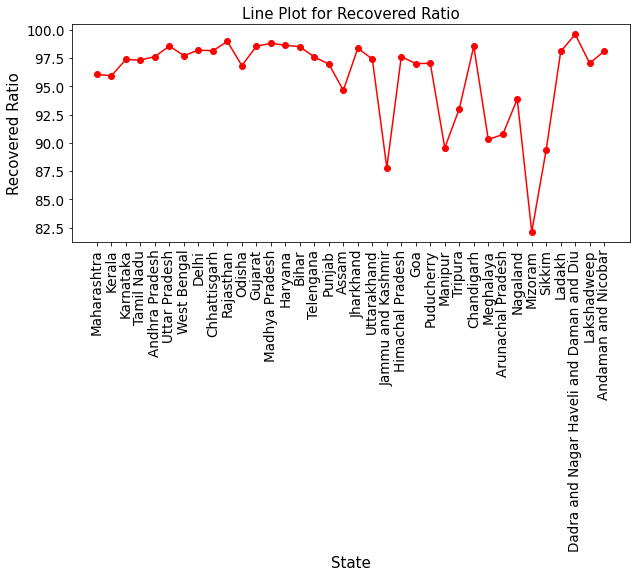

In [36]:
plt.figure(figsize=(10,4))
plt.plot(df['State/UTs'],df['recovered_ratio(%)'],color='red',marker='o')
plt.xticks(rotation=90,fontsize=13.5)
plt.yticks(fontsize=13.5)
plt.xlabel('State', fontsize=15)
plt.ylabel('Recovered Ratio', fontsize=15)
plt.title("Line Plot for Recovered Ratio",fontsize=15)
plt.show()


- Dadra and Nagar Haveli and Daman and Diu was the most recovered state/UT

- Top 10 states with the most recovered ratio

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


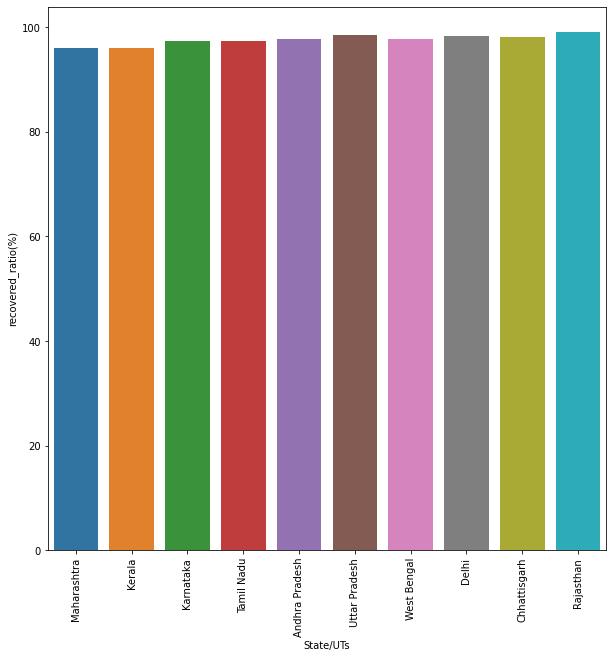

In [37]:
plt.figure(figsize=(10,10));
sns.barplot(k["State/UTs"].head(10),df['recovered_ratio(%)'],data=df);
plt.xticks(rotation=90);

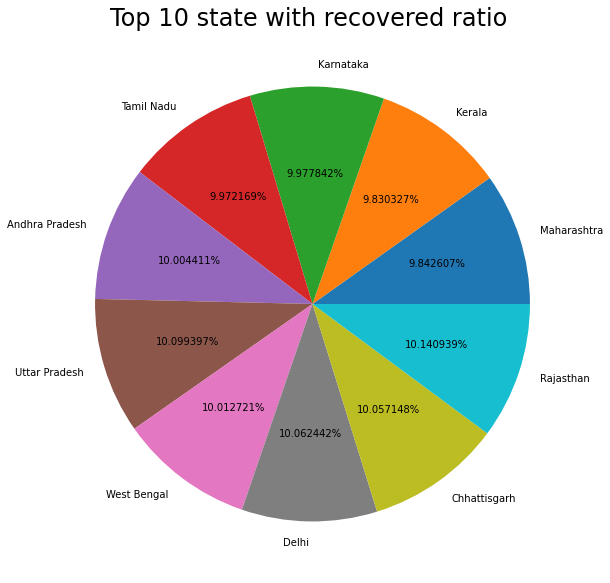

In [38]:
plt.figure(figsize=(20,10));
plt.pie(x=df['recovered_ratio(%)'].head(10),data=df,labels=df["State/UTs"].head(10),autopct="%1f%%");
plt.title("Top 10 state with recovered ratio ", fontsize = 24);

- Uttar Pradesh has the highest recovery ratio : 10.099397%

- Bottom 10 states with the recovered ratio

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


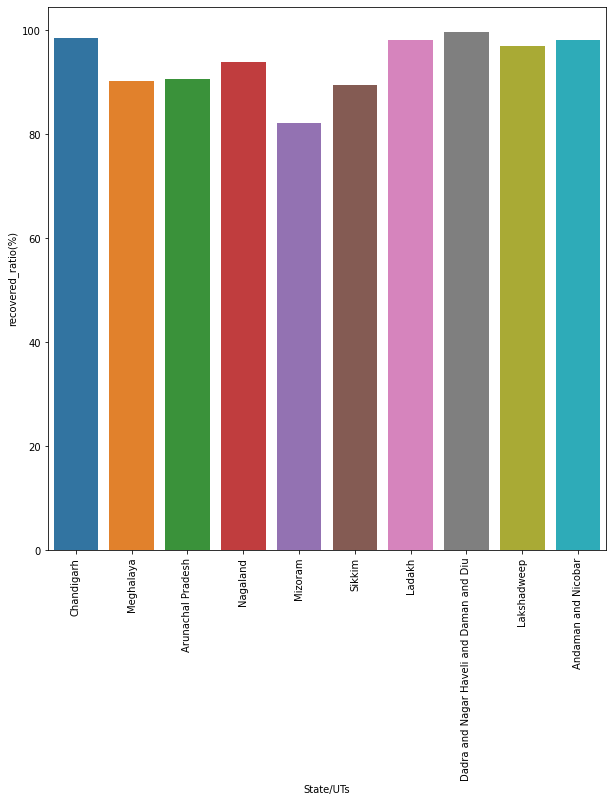

In [39]:
plt.figure(figsize=(10,10));
sns.barplot(k["State/UTs"].tail(10),df['recovered_ratio(%)'],data=df);
plt.xticks(rotation=90);

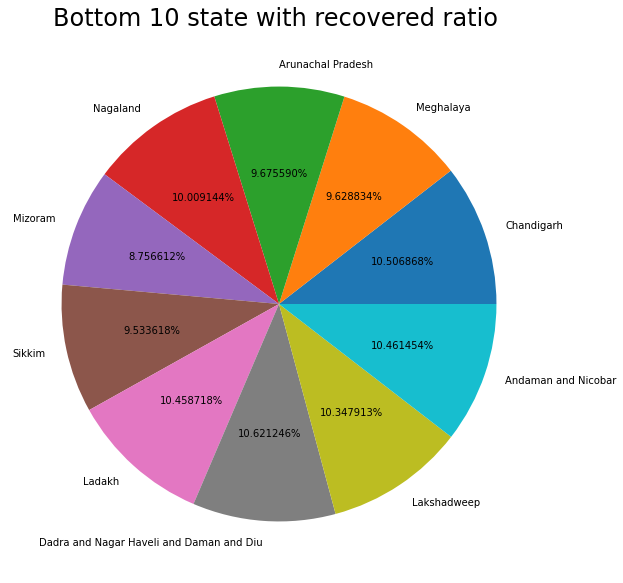

In [40]:
plt.figure(figsize=(20,10));
plt.pie(x=df['recovered_ratio(%)'].tail(10),data=df,labels=df["State/UTs"].tail(10),autopct="%1f%%");
plt.title("Bottom 10 state with recovered ratio ", fontsize = 24);

- Dadra and Nagar Haveli and Daman and Diu has the lowest recoverey rate 